In [13]:
import pandas as pd
import numpy as np
#import libraries
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /home/preety/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/preety/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv("sentiment_data.csv", encoding='cp1252')

In [3]:
df.head()

,Sentence
0,"Turning to financial conditions, money markets..."
1,"In the debt markets, yields hardened in the se..."
2,"The Indian rupee (INR) traded range-bound, dis..."
3,The INR was also buoyed by sustained capital i...
4,Domestic equity indices outperformed the peer ...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  20 non-null     object
dtypes: object(1)
memory usage: 288.0+ bytes


In [5]:
#Text Cleaning
def Text_Cleaning(Text):    
    # Lowercase the texts
    Text = Text.lower()

    # Cleaning punctuations in the text
    punc = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    Text = Text.translate(punc)

    # Removing numbers in the text
    Text = re.sub(r'\d+', '', Text)

    # Remove possible links
    Text = re.sub('https?://\S+|www\.\S+', '', Text)

    # Deleting newlines
    Text = re.sub('\n', '', Text)

    return Text

In [6]:
#Text Preprocessing
# Stopwords
Stopwords = set(nltk.corpus.stopwords.words("english")) - set(["not"])

def Text_Processing(Text):    
    Processed_Text = list()
    Lemmatizer = WordNetLemmatizer()

    # Tokens of Words
    Tokens = nltk.word_tokenize(Text)

    # Removing Stopwords and Lemmatizing Words
    # To reduce noises in our dataset, also to keep it simple and still 
    # powerful, we will only omit the word `not` from the list of stopwords

    for word in Tokens:
        if word not in Stopwords:            
            Processed_Text.append(Lemmatizer.lemmatize(word))            
    return(" ".join(Processed_Text))

In [7]:
#Apply the functions
df['Sentence'] = df['Sentence'].apply(Text_Cleaning)

In [8]:
df

,Sentence
0,turning to financial conditions money markets...
1,in the debt markets yields hardened in the se...
2,the indian rupee inr traded range bound dis...
3,the inr was also buoyed by sustained capital i...
4,domestic equity indices outperformed the peer ...
5,after two years of large gains however valua...
6,unlike in the first wave the economic impact ...
7,growth impulses rejuvenated by the receding o...
8,the omicron led third wave hit india at the en...
9,omicron rising food prices and sticky inflati...


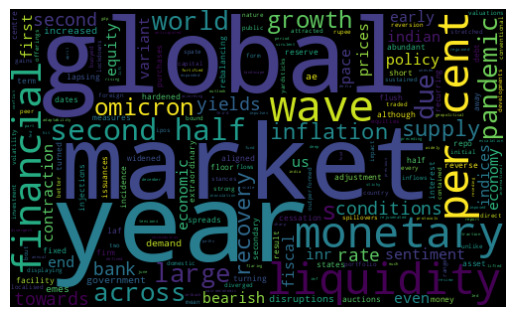

In [9]:
# Word cloud visualization.
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

allWords = ' '.join([twts for twts in df['Sentence']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

,Sentence
0,turning to financial conditions money markets...
1,in the debt markets yields hardened in the se...
2,the indian rupee inr traded range bound dis...
3,the inr was also buoyed by sustained capital i...
4,domestic equity indices outperformed the peer ...
5,after two years of large gains however valua...
6,unlike in the first wave the economic impact ...
7,growth impulses rejuvenated by the receding o...
8,the omicron led third wave hit india at the en...
9,omicron rising food prices and sticky inflati...


In [14]:
# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Compute sentiment scores for each sentence
df['Sentiment_Score'] = df['Sentence'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [15]:
df

,Sentence,Sentiment_Score
0,turning to financial conditions money markets...,0.6705
1,in the debt markets yields hardened in the se...,-0.3612
2,the indian rupee inr traded range bound dis...,0.5106
3,the inr was also buoyed by sustained capital i...,0.4215
4,domestic equity indices outperformed the peer ...,0.0000
5,after two years of large gains however valua...,0.3400
6,unlike in the first wave the economic impact ...,0.4404
7,growth impulses rejuvenated by the receding o...,0.3818
8,the omicron led third wave hit india at the en...,0.0000
9,omicron rising food prices and sticky inflati...,-0.6124


In [17]:
def getAnalysis(score):
 if score < 0:
    return 'Negative'
 elif score == 0:
    return 'Neutral'
 else:
    return 'Positive'

df['sentiment'] = df['Sentiment_Score'].apply(getAnalysis)


In [18]:
df.head()

,Sentence,Sentiment_Score,sentiment
0,turning to financial conditions money markets...,0.6705,Positive
1,in the debt markets yields hardened in the se...,-0.3612,Negative
2,the indian rupee inr traded range bound dis...,0.5106,Positive
3,the inr was also buoyed by sustained capital i...,0.4215,Positive
4,domestic equity indices outperformed the peer ...,0.0000,Neutral


In [19]:
df['sentiment'].value_counts()

sentiment
Positive    8
Negative    8
Neutral     4
Name: count, dtype: int64

Text(0, 0.5, 'RBI Sentiment')

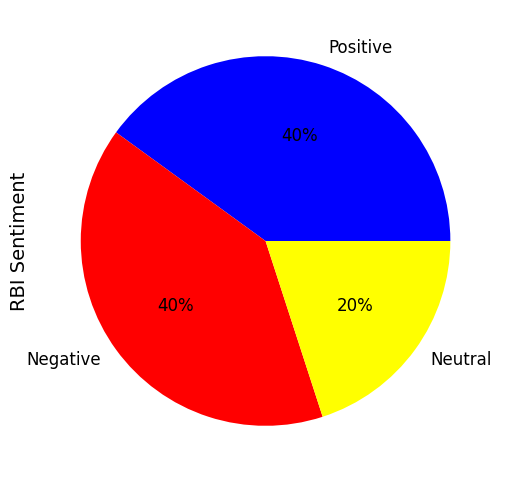

In [20]:
df.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%',  fontsize=12, figsize=(9,6), colors=["blue", "red", "yellow"])
plt.ylabel("RBI Sentiment", size=14)

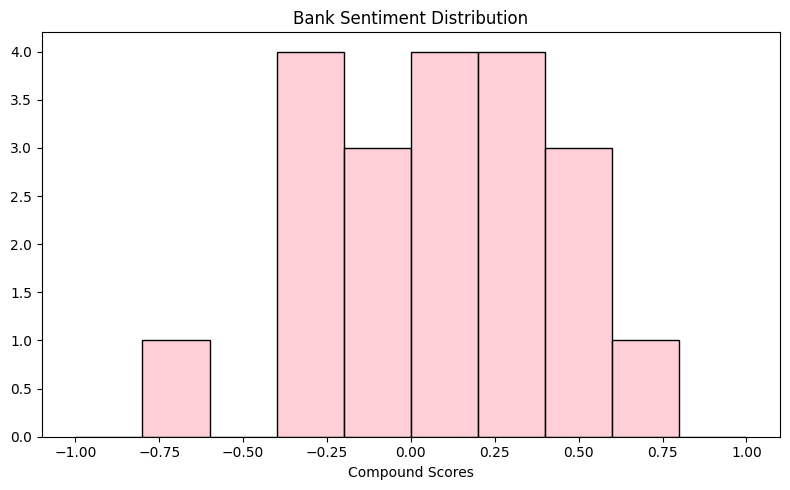

In [22]:
plt.figure(figsize=(8, 5))
sns.histplot(df, x='Sentiment_Score', color="pink", bins=10, binrange=(-1, 1))
plt.title("Bank Sentiment Distribution")
plt.xlabel("Compound Scores")
plt.ylabel("")
plt.tight_layout()